In [1]:
from QES.Algebra.Model.Interacting.Spin.heisenberg_kitaev   import HeisenbergKitaev, HoneycombLattice
from QES.Algebra.hilbert                                    import HilbertSpace
import matplotlib.pyplot    as plt
import numpy                as np

In [2]:
lat             =   HoneycombLattice(lx=2, ly=2)
lat

HON,pbc,d=2,Ns=8,Lx=2,Ly=2,Lz=1

### a) NO SYMMETRIES

In [3]:
hilbert_no_sym  =   HilbertSpace(lattice=lat)
model_no_sym    =   HeisenbergKitaev(
                        lattice         =   lat, 
                        hilbert_space   =   hilbert_no_sym, 
                        dtype           =   complex,
                        K               =   (1.0, 1.0, 1.0),       
                )
model_no_sym

Kitaev(Ns=8,Kx=1.000,Ky=1.000,Kz=1.000,dlt=1.000)

15_12_2025_03-18_44 [INFO] 		->[Kitaev-Heisenberg-Gamma Model] Calculating the Hamiltonian matrix using NumPy...


array([-6.92820323, -6.47213595, -6.47213595, -6.47213595, -5.80642385,
       -5.80642385, -5.80642385, -5.80642385, -5.80642385, -5.80642385])

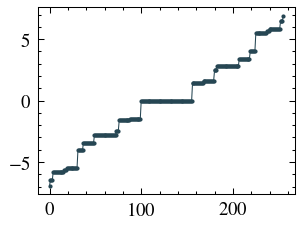

In [4]:
if model_no_sym.eig_val is None: 
    model_no_sym.diagonalize(build=True)

plt.figure(figsize=(2,1.5))
plt.plot(model_no_sym.eig_val, marker='o', ms=1, lw=0.5)
model_no_sym.eig_val[:10]

#### Check matrix-vector product

In [5]:
s_new = model_no_sym.matvec(model_no_sym.eig_vec[:, 0])
s_ovr = np.dot(model_no_sym.eig_vec[:, 0], s_new)
s_ovr

np.complex128(-6.928203230275505+0j)

### b) WITH SYMMETRIES


In [9]:
hilbert_sym     =   HilbertSpace(
                        lattice         =   lat, 
                        sym_gen         =   {
                                            'translation'   : {
                                                'kx'    :   0,
                                                'ky'    :   0
                                            },
                                            'parity'    : {
                                                'x'     :   1,
                                                'z'     :   1,
                                            }
                                            # 'inversion' : 1
                                        },
                        verbose         =   False
                        )
model_sym       =   HeisenbergKitaev(
                        lattice         =   lat, 
                        hilbert_space   =   hilbert_sym, 
                        dtype           =   complex,
                        K               =   (1.0, 1.0, 1.0))
model_sym, model_sym.sym

(Kitaev(Ns=8,Kx=1.000,Ky=1.000,Kz=1.000,dlt=1.000), 'kx=0,ky=0,px=p')

In [10]:
model_sym.sym

'kx=0,ky=0,px=p'

15_12_2025_03-19_26 [INFO] 		->[Kitaev-Heisenberg-Gamma Model] Calculating the Hamiltonian matrix using NumPy...


(array([-6.92820323, -6.47213595, -6.47213595, -6.47213595, -5.80642385,
        -5.46410162, -4.        , -4.        , -4.        , -3.41855072]),
 44)

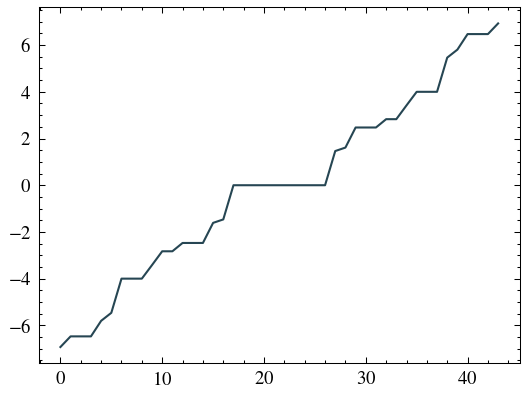

In [11]:
if model_sym.eig_val is None: 
    model_sym.diagonalize(build=True)

plt.plot(model_sym.eig_val)
model_sym.eig_val[:10], len(model_sym.eig_val)

#### Check matrix-vector product

In [13]:
s_new = model_sym.matvec(model_sym.eig_vec[:, :10], hilbert=hilbert_sym)
s_ovr = np.dot(model_sym.eig_vec[:, 0], s_new)
s_ovr

array([-6.92820323e+00+0.j,  3.19189120e-16+0.j, -3.90312782e-18+0.j,
       -5.65500755e-14+0.j,  6.58852737e-16+0.j, -2.82559488e-16+0.j,
        1.23242983e-16+0.j,  4.46729913e-18+0.j,  6.35191548e-18+0.j,
        1.42968691e-16+0.j])

### c) MULTIPLE SYMMETRY SECTORS

In [15]:
all_energies = []
sum_energies = 0

for i in range(lat.lx):
    for j in range(lat.ly):
        for inv in [-1, 1]:
            sym_gen         =   {
                            'translation'   : {
                                                'kx'    :   i,
                                                'ky'    :   j
                                            },
                            'inversion'     : inv
                            }
            hilbert_sym     =   HilbertSpace(
                                    verbose         =   True,
                                    lattice         =   lat, 
                                    sym_gen         =   sym_gen)
            model_sym       =   HeisenbergKitaev(
                                    lattice         =   lat, 
                                    hilbert_space   =   hilbert_sym, 
                                    dtype           =   complex,
                                    K               =   (1.0, 1.0, 1.0))
            if model_sym.eig_val is None: 
                model_sym.diagonalize(build=True)

            # add info
            nh              = model_sym.nh
            sum_energies   += nh
            print(f'kx={i},ky={j},inv={inv} -> nh={nh}/{sum_energies}')
                
            if model_sym.eig_val is not None and nh > 0:
                all_energies.extend(list(model_sym.eig_val))
                
            
all_energies = np.sort(np.array(all_energies).flatten())

15_12_2025_03-20_31 [INFO] 	->[HilbertSpace] Building representatives.
15_12_2025_03-20_31 [INFO] 			->[HilbertSpace] Explicitly requested immediate mapping generation.
15_12_2025_03-20_31 [INFO] 			->Added symmetry generator: Translation_x = 0
15_12_2025_03-20_31 [INFO] 			->Added symmetry generator: Translation_y = 0
15_12_2025_03-20_31 [INFO] 			->Added symmetry generator: Inversion = -1
15_12_2025_03-20_31 [INFO] 		->Built symmetry group with 8 elements (4 translation x 2 base)
15_12_2025_03-20_31 [INFO] 		->[HilbertSpace] SymmetryContainer initialized: 3 generators -> 8 group elements
15_12_2025_03-20_31 [INFO] 		->Generating symmetric basis for 256 states...
15_12_2025_03-20_31 [INFO] 			->Generated phases map. Took: 2.55e-04s
15_12_2025_03-20_31 [INFO] 			->Allocated compact mapping arrays. Took: 4.28e-03s
15_12_2025_03-20_31 [INFO] 			->Identifying unique representatives...
15_12_2025_03-20_31 [INFO] 				->Completed scanning all states. Took: 7.97e-03s
15_12_2025_03-20_31 [INFO

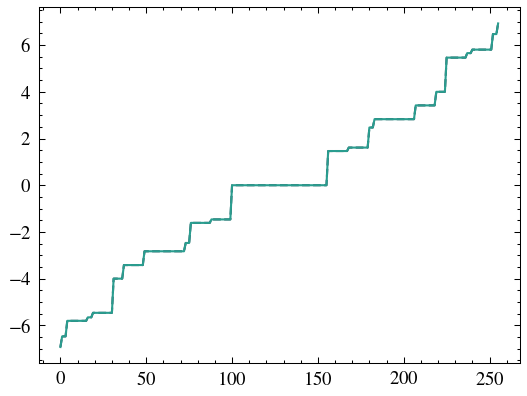

In [17]:
plt.plot(np.sort(all_energies), label = 'sym', ls = '--')
plt.plot(model_no_sym.eig_val, label = 'sym', ls = '-')